In [1]:
import numpy as np
import pandas as pd

# Importing data
sales = pd.read_csv("c:/data/mva/sales.csv")
sales.head(3)

,ID,X1,X2,X3,X4,Y1,Y2,Y3
0,1,9,12,9,20,93.0,96.0,97.8
1,2,7,10,10,15,88.8,91.8,96.8
2,3,8,12,9,26,95.0,100.3,99.0


In [2]:
# Dropping unnecessary variable
sales_desc = sales.iloc[:,1:].describe()
sales_desc

,X1,X2,X3,X4,Y1,Y2,Y3
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,11.200000,14.18000,10.560000,29.760000,98.836000,106.622000,102.810000
std,3.943478,3.38478,2.139617,10.537707,7.337345,10.124315,4.712218
min,1.000000,5.00000,5.000000,9.000000,81.500000,87.300000,94.300000
25%,8.250000,12.00000,9.000000,21.500000,93.550000,99.500000,99.075000
50%,10.000000,15.00000,11.000000,31.500000,100.650000,106.250000,103.150000
75%,14.000000,17.00000,12.000000,37.000000,105.050000,114.750000,106.450000
max,18.000000,20.00000,15.000000,51.000000,110.800000,122.300000,115.300000


In [3]:
# Standard deviation
sales_desc.loc['std']

X1     3.943478
X2     3.384780
X3     2.139617
X4    10.537707
Y1     7.337345
Y2    10.124315
Y3     4.712218
Name: std, dtype: float64

In [5]:
# Variables
xlist = ['X1','X2','X3','X4']
ylist = ['Y1','Y2','Y3']

exam = sales[xlist]
perform = sales[ylist]

In [8]:
# Z-score Standardization: Direct method using z = (x-mu)/std
X_mc = (exam - exam.mean())/exam.std()
Y_mc = (perform - perform.mean())/perform.std()

In [9]:
# Canonical Correlation Analysis
from sklearn.cross_decomposition import CCA
# CCA(n_components=2, scale=True) dafault
ca = CCA(n_components=3)
ca.fit(exam, perform)
X_c, Y_c = ca.transform(exam, perform)
X_c.shape
Y_c.shape

(50, 3)

In [10]:
# Ccanonical Correlation Scores
cc_res = pd.DataFrame({"CCX_1":X_c[:,0],
 "CCY_1":Y_c[:,0],
 "CCX_2":X_c[:,1],
 "CCY_2":Y_c[:,1],
 "CCX_3":X_c[:,2],
 "CCY_3":Y_c[:,2]})
cc_res.head()

,CCX_1,CCY_1,CCX_2,CCY_2,CCX_3,CCY_3
0,-1.296365,-1.586000,-0.062160,0.122380,-0.074753,0.258465
1,-1.871090,-2.280234,0.465646,0.135849,0.371038,0.016694
2,-0.880385,-1.080877,-0.430363,-0.016271,0.080729,0.211404
3,0.165755,0.624818,0.590930,0.707007,0.146007,-0.101087
4,0.281532,0.379810,0.107278,0.109038,0.656132,0.314689


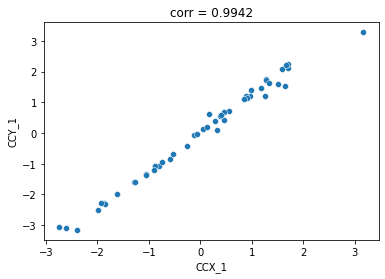

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# the first pair of canonical covariates
sns.scatterplot(x="CCX_1", y="CCY_1", data=cc_res)
plt.title('corr = %.4f' % np.corrcoef(X_c[:,0], Y_c[:,0])[0,1])
plt.show()

In [14]:
# canonical correlation coefficients for X
ca.x_weights_

array([[ 0.72465084,  0.28244397,  0.62857503],
       [ 0.3792581 , -0.92503949, -0.02156922],
       [ 0.57536463,  0.25402232, -0.77744981]])

In [15]:
# canonical correlation coefficients for Y
ca.y_weights_

array([[ 0.72465084,  0.28244397,  0.62857503],
       [ 0.3792581 , -0.92503949, -0.02156922],
       [ 0.57536463,  0.25402232, -0.77744981]])